<a href="https://colab.research.google.com/github/adelrio89/data_science_for_public_policy/blob/master/Tarea_2_Curso_Visualizaci%C3%B3n_de_Datos_Andr%C3%A9s_Del_R%C3%ADo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 2**
Curso Análisis y Visualización de Datos <br>
Diplomado Ciencia de Datos para Políticas Públicas <br>
Universidad Católica de Chile <br>
Cristian París / Francisco Alissandri

---

Andrés Del Río <br>
derigo86@gmail.com

En esta tarea, Ud. trabajará con modelos de Redes Neuronales aplicados a problemas del ámbito de la Educación en Chile. Las bases de datos relevantes se encuentran disponibles en el sitio web del curso para que Ud.
pueda descargarlas.<br>
El formato de entrega de la tarea consistirá en un documento Jupyter Notebook o R Markdown (el que Ud. prefiera, dependiendo de si trabaja localmente o en Google Colab), conteniendo las celdas de código pertinentes,
los gráficos y las celdas de texto con sus análisis y comentarios.<br>
Para que sus resultados sean reproducibles durante la corrección, asegúrese de definir semillas en su código antes de realizar operaciones que impliquen aleatoriedad.<br>
La nota de la tarea será el máximo entre 1 y la cantidad de puntos obtenida (7 puntos en total).

In [1]:
library(tidyverse)
install.packages("data.table")
library(data.table)

# Modelos
install.packages("caret")
library(caret)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’,

## **Problema 1. (4 puntos)**

<p align="justify">
Con el objetivo de implementar políticas públicas para apoyar a estudiantes con bajo rendimiento en el país, se desea desarrollar modelos predictivos que indiquen si un alumno tendrá rendimiento bajo o alto en primero medio, tomando como referencia sus notas en octavo básico, así como otras variables. </p>

In [2]:
system("gdown --id 1HwK7jzM8iRCMgvS0KX1LtZSo9IcjuoLZ")
datosProb1 <- fread("BD_Tarea2_Problema1.csv", stringsAsFactors = T)

In [3]:
summary(datosProb1)

       V1         PROM_GRAL_2018     GEN_ALU      COD_REG_RBD_2018
 Min.   :     1   Min.   :3.400   Min.   :1.000   Min.   : 1.000  
 1st Qu.: 45302   1st Qu.:5.300   1st Qu.:1.000   1st Qu.: 6.000  
 Median : 90603   Median :5.700   Median :2.000   Median :10.000  
 Mean   : 90603   Mean   :5.735   Mean   :1.507   Mean   : 9.698  
 3rd Qu.:135904   3rd Qu.:6.200   3rd Qu.:2.000   3rd Qu.:13.000  
 Max.   :181205   Max.   :7.000   Max.   :2.000   Max.   :16.000  
 RURAL_RBD_2018    ASISTENCIA_2018  RENDIMIENTO  
 Min.   :0.00000   Min.   :  1.00   alto:110383  
 1st Qu.:0.00000   1st Qu.: 91.00   bajo: 70822  
 Median :0.00000   Median : 95.00                
 Mean   :0.07074   Mean   : 93.21                
 3rd Qu.:0.00000   3rd Qu.: 98.00                
 Max.   :1.00000   Max.   :100.00                

In [4]:
str(datosProb1)

Classes ‘data.table’ and 'data.frame':	181205 obs. of  7 variables:
 $ V1              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PROM_GRAL_2018  : num  5.7 5.1 5.3 6.2 5.8 5.6 4.8 6.2 6 5.6 ...
 $ GEN_ALU         : int  1 1 2 2 2 1 1 2 1 1 ...
 $ COD_REG_RBD_2018: int  8 13 5 2 13 12 7 13 10 13 ...
 $ RURAL_RBD_2018  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ASISTENCIA_2018 : int  86 97 97 98 100 95 92 99 99 85 ...
 $ RENDIMIENTO     : Factor w/ 2 levels "alto","bajo": 1 2 2 1 1 1 2 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


**(a) (1 punto)** Usando las funciones del paquete caret, separe los datos en un conjunto de entrenamiento y uno de testeo usando la variable RENDIMIENTO, dejando un 70 % de los mismos para el entrenamiento, y ajuste un modelo de Regresión Logística para la variable RENDIMIENTO, en función del resto de
variables. Calcule el error cometido por el modelo dentro y fuera de la muestra, y comente respecto al poder de generalización del modelo.

In [5]:
datosProb1$GEN_ALU <- as.factor(as.character(datosProb1$GEN_ALU))
datosProb1$RURAL_RBD_2018 <- as.factor(as.character(datosProb1$RURAL_RBD_2018))
datosProb1$COD_REG_RBD_2018 <- as.factor(as.character(datosProb1$COD_REG_RBD_2018))

In [6]:
str(datosProb1)

Classes ‘data.table’ and 'data.frame':	181205 obs. of  7 variables:
 $ V1              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PROM_GRAL_2018  : num  5.7 5.1 5.3 6.2 5.8 5.6 4.8 6.2 6 5.6 ...
 $ GEN_ALU         : Factor w/ 2 levels "1","2": 1 1 2 2 2 1 1 2 1 1 ...
 $ COD_REG_RBD_2018: Factor w/ 16 levels "1","10","11",..: 15 5 12 9 5 4 14 5 2 5 ...
 $ RURAL_RBD_2018  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ASISTENCIA_2018 : int  86 97 97 98 100 95 92 99 99 85 ...
 $ RENDIMIENTO     : Factor w/ 2 levels "alto","bajo": 1 2 2 1 1 1 2 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [7]:
set.seed(86)
inTraining <- createDataPartition(datosProb1$RENDIMIENTO, p = 0.7, list = FALSE)
training <- datosProb1[ inTraining,]
testing  <- datosProb1[-inTraining,]

In [8]:
model_logit <- train(RENDIMIENTO ~ PROM_GRAL_2018 + GEN_ALU + COD_REG_RBD_2018 + RURAL_RBD_2018 + ASISTENCIA_2018,
                data = training,
                method = "glm",
                family = "binomial")

In [9]:
model_logit

Generalized Linear Model 

126845 samples
     5 predictor
     2 classes: 'alto', 'bajo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 126845, 126845, 126845, 126845, 126845, 126845, ... 
Resampling results:

  Accuracy   Kappa    
  0.7864525  0.5468895


In [10]:
summary(model_logit)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4241  -0.6942  -0.2811   0.7176   3.1446  

Coefficients:
                    Estimate Std. Error  z value Pr(>|z|)    
(Intercept)        19.553653   0.150736  129.721  < 2e-16 ***
PROM_GRAL_2018     -3.332799   0.019581 -170.202  < 2e-16 ***
GEN_ALU2           -0.185168   0.014777  -12.531  < 2e-16 ***
COD_REG_RBD_201810  0.299862   0.060587    4.949 7.45e-07 ***
COD_REG_RBD_201811  0.091263   0.104670    0.872 0.383255    
COD_REG_RBD_201812  0.372634   0.096538    3.860 0.000113 ***
COD_REG_RBD_201813  0.175086   0.052653    3.325 0.000883 ***
COD_REG_RBD_201814  0.164669   0.073867    2.229 0.025796 *  
COD_REG_RBD_201815  0.046349   0.086395    0.536 0.591623    
COD_REG_RBD_201816  0.356120   0.067404    5.283 1.27e-07 ***
COD_REG_RBD_20182   0.126990   0.066996    1.895 0.058027 .  
COD_REG_RBD_20183   0.384282   0.083612    4.596 4.31e-06 ***
COD_REG_RBD_20184   0.103210   0.061985    1.665 0.09

In [11]:
# Definimos la función para el cálculo de la entropía
error_entropia_binaria = function(u,v){
  # Si la categoría fuese un factor, convertimos preventivamente en un caracter
  u = as.character(u)   
  # Calculamos la entropía
  entropia = ifelse(u=="bajo", -log(v), -log(1-v))
  # Retornamos el cálculo anterior si no es NaN; en caso contrario retornamos cero
  ifelse(is.na(entropia),0,entropia)                 
  }

# Predecimos la probabilidad condicional con el modelo
pred_train = predict(model_logit, newdata = training,  type = "prob")
real_train = training$RENDIMIENTO

# Calculamos el error dentro de la muestra 
Ein = mean(error_entropia_binaria(real_train, pred_train[,2]))
cat("El error dentro de la muestra, calculado directamente, es ", Ein,"\n")
cat("Calculándolo a partir de la devianza residual, es ", model_logit$finalModel$deviance/(2*nrow(training)),"\n")

El error dentro de la muestra, calculado directamente, es  0.4495662 
Calculándolo a partir de la devianza residual, es  0.4495662 


In [12]:
pred_test = predict(model_logit, newdata = testing,  type = "prob")
real_test = testing$RENDIMIENTO

# Calculamos el error fuera de la muestra 
Eout = mean(error_entropia_binaria(real_test, pred_test[,2]))
cat("El error fuera de la muestra es ", Eout,"\n")

El error fuera de la muestra es  0.4467349 


Hay un 45% de error dentro y fuera de la muestra, lo que no supone un buen modelo en general. Si se compara con tirar una moneda al aire para predecir el resultado, el modelo es apenas un 5% superior.

**(b) (1 punto)** Utilizando las mismas variables explicativas y la misma separación en entrenamiento y testeo del item anterior, entrene utilizando el paquete caret una red neuronal con una capa oculta de 10 neuronas para la variable RENDIMIENTO, realizando validación cruzada con 5 grupos y dejando el parámetro decay en cero. Grafique la red neuronal; calcule y reporte el error dentro de la muestra, el error fuera de la muestra y la estimación del error fuera de la muestra entregada por la validación cruzada.

In [13]:
install.packages("nnet")
library(nnet)

install.packages("NeuralNetTools")
library(NeuralNetTools)

install.packages("MLmetrics")
library(MLmetrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [14]:
Resumen  <- function(data, lev = NULL, model = NULL){
  a1 <- defaultSummary(data, lev, model)    # Entrega Accuracy y Kappa
  b1 <- twoClassSummary(data, lev, model)   # Entrega ACU, Sensitividad y Especificidad
  c1 <- prSummary(data, lev, model)         # Entrega Precisión y Recall
  d1 <- mnLogLoss(data, lev, model)         # Entrega Entropía 
  out <- c(a1, b1, c1, d1)                  # Combino todo lo anterior en una matriz
  out
  }

In [15]:
train_control <- trainControl(method = "cv", number = 5, summaryFunction=Resumen, classProbs=TRUE)
hp <- expand.grid(.size = 10, .decay = 0)

set.seed(86)
model_nnet <- train(form = RENDIMIENTO ~ PROM_GRAL_2018 + GEN_ALU + COD_REG_RBD_2018 + RURAL_RBD_2018 + ASISTENCIA_2018,
          data = training,
          method = "nnet",
          trControl = train_control,
          tuneGrid = hp,
          maxit = 100,
          trace = FALSE
)

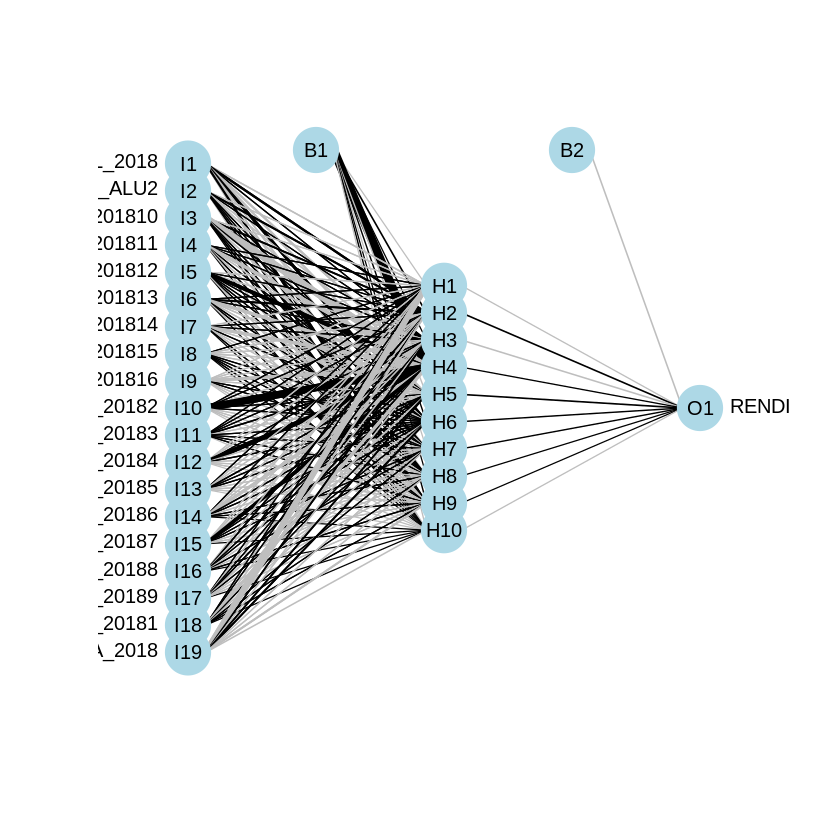

In [16]:
plotnet(model_nnet)

In [17]:
model_nnet

Neural Network 

126845 samples
     5 predictor
     2 classes: 'alto', 'bajo' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 101475, 101476, 101476, 101476, 101477 
Resampling results:

  Accuracy   Kappa     ROC        Sens       Spec       AUC        Precision
  0.7490008  0.433871  0.7874439  0.8702062  0.5600864  0.8356102  0.7726687
  Recall     F          logLoss  
  0.8702062  0.8116783  0.4964165

Tuning parameter 'size' was held constant at a value of 10
Tuning
 parameter 'decay' was held constant at a value of 0

In [18]:
# Predecimos la probabilidad condicional con el modelo
pred_train_nnet = predict(model_nnet, newdata = training,  type = "prob")
real_train_nnet = training$RENDIMIENTO

# Calculamos el error dentro de la muestra 
Ein_nnet = mean(error_entropia_binaria(real_train_nnet, pred_train_nnet[,2]))
cat("El error dentro de la muestra, calculado directamente, es ", Ein_nnet,"\n")

El error dentro de la muestra, calculado directamente, es  0.6296482 


In [19]:
# Predecimos la probabilidad condicional en el conjunto de testing
pred_test_nnet = predict(model_nnet, newdata = testing,  type = "prob")
real_test_nnet = training$RENDIMIENTO

# Calculamos el error fuera de la muestra 
Eout_nnet = mean(error_entropia_binaria(real_test_nnet, pred_test_nnet[,2]))
cat("El error fuera de la muestra es ", Eout_nnet,"\n")

El error fuera de la muestra es  0.7130541 


El error fuera de la muestra calculado "manualmente" fue mayor (71.30%) respecto al error dentro de la muestra (62.96%), lo cual indica que el modelo no generaliza bien. El error fuera de la muestra calculado por caret (49.64% - LogLoss) fue significativamente menor a los errores calculos solo con el conjunto de entrenamiento y el conjunto de pruebas, sin validación cruzada. 

**(c) (1 punto)** Calcule la matriz de confusión en el conjunto de testing para los modelos entrenados en los ítems anteriores, definiendo como clase positiva el valor “BAJO” de la variable RENDIMIENTO. ¿Qué modelo es más exacto? ¿Qué modelo tiene mayor precisión?

In [20]:
# Matriz de confusión en el conjunto de testing del modelo logísitco
pred_test_class = predict(model_logit, newdata=testing, type = "raw")
real_test_class = testing$RENDIMIENTO

confusionMatrix(pred_test_class,real_test_class,positive="bajo")

Confusion Matrix and Statistics

          Reference
Prediction  alto  bajo
      alto 27898  6241
      bajo  5216 15005
                                          
               Accuracy : 0.7892          
                 95% CI : (0.7858, 0.7927)
    No Information Rate : 0.6092          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5535          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7063          
            Specificity : 0.8425          
         Pos Pred Value : 0.7421          
         Neg Pred Value : 0.8172          
             Prevalence : 0.3908          
         Detection Rate : 0.2760          
   Detection Prevalence : 0.3720          
      Balanced Accuracy : 0.7744          
                                          
       'Positive' Class : bajo            
                  

In [21]:
# Matriz de confusión en el conjunto de testing del modelo de redes neuronales
pred_test_class2 = predict(model_nnet, newdata=testing, type = "raw")
real_test_class2 = testing$RENDIMIENTO

confusionMatrix(pred_test_class2,real_test_class2,positive="bajo")

Confusion Matrix and Statistics

          Reference
Prediction  alto  bajo
      alto 33113 21246
      bajo     1     0
                                         
               Accuracy : 0.6091         
                 95% CI : (0.605, 0.6132)
    No Information Rate : 0.6092         
    P-Value [Acc > NIR] : 0.5054         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.0000000      
            Specificity : 0.9999698      
         Pos Pred Value : 0.0000000      
         Neg Pred Value : 0.6091540      
             Prevalence : 0.3908389      
         Detection Rate : 0.0000000      
   Detection Prevalence : 0.0000184      
      Balanced Accuracy : 0.4999849      
                                         
       'Positive' Class : bajo           
                                      

El modelo de regresión logística es exacto (accuracy en inglés) en sus predicciones un 78.92% de las veces, mientras que el modelo de redes neuronales apenas un 60.91%. En cuanto a la precisión (precision en inglés), el modelo logístico es también mejor (74.21% - Pos Pred Value) respecto al modelo de redes neuronales (0% - Pos Pred Value)

## **Problema 2. (4 puntos)**

<p align="justify">
Este problema continúa el análisis de las preferencias de los estudiantes por diversos tipos de carreras de Educación Superior, comenzado en el Problema 2 de la Tarea 1. Esta vez, nos enfocaremos en estudiantes de la región de Coquimbo, e intentaremos modelar sus preferencias mediante Redes Neuronales. En específico, nos enfocaremos en la variable CYT, que identifica a los estudiantes que eligieron carreras de las áreas de Ciencias Básicas o Tecnología en 2019 (valor “si” en este caso, “no” en caso contrario). </p>

In [22]:
system("gdown --id 1M4sgvi61Lt-e_qNssYqcVv_zn1igHofJ")
datosProb2 <- fread("BD_Tarea2_Problema2.csv", stringsAsFactors = T)

In [23]:
str(datosProb2)

Classes ‘data.table’ and 'data.frame':	124781 obs. of  9 variables:
 $ V1         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ COD_REG_RBD: int  14 13 10 5 5 2 13 14 14 13 ...
 $ RURAL_RBD  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ COD_DEPE2  : int  1 2 2 2 2 1 2 1 1 4 ...
 $ GEN_ALU    : int  2 2 2 1 1 1 2 2 1 2 ...
 $ EDAD_ALU   : int  17 17 50 17 17 17 17 17 17 17 ...
 $ PROM_GRAL  : num  5.6 6.7 6.5 6.7 5.6 5.8 5.9 6.4 6.2 5.8 ...
 $ ASISTENCIA : int  96 91 100 99 92 93 93 95 91 83 ...
 $ CYT        : Factor w/ 2 levels "no","si": 1 1 1 1 2 2 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [24]:
summary(datosProb2)

       V1          COD_REG_RBD       RURAL_RBD         COD_DEPE2    
 Min.   :     1   Min.   : 1.000   Min.   :0.00000   Min.   :1.000  
 1st Qu.: 31196   1st Qu.: 6.000   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 62391   Median :10.000   Median :0.00000   Median :2.000  
 Mean   : 62391   Mean   : 9.473   Mean   :0.02438   Mean   :1.931  
 3rd Qu.: 93586   3rd Qu.:13.000   3rd Qu.:0.00000   3rd Qu.:2.000  
 Max.   :124781   Max.   :16.000   Max.   :1.00000   Max.   :5.000  
    GEN_ALU         EDAD_ALU       PROM_GRAL       ASISTENCIA     CYT       
 Min.   :1.000   Min.   : 6.00   Min.   :2.000   Min.   :  1.00   no:87489  
 1st Qu.:1.000   1st Qu.:17.00   1st Qu.:5.500   1st Qu.: 89.00   si:37292  
 Median :2.000   Median :17.00   Median :6.000   Median : 94.00             
 Mean   :1.511   Mean   :17.83   Mean   :5.923   Mean   : 91.79             
 3rd Qu.:2.000   3rd Qu.:18.00   3rd Qu.:6.300   3rd Qu.: 97.00             
 Max.   :2.000   Max.   :72.00   Max.   :7.000   Max.  

**(a) (0.5 puntos)** Filtre apropiadamente la base de datos para obtener a los estudiantes que corresponden a la región de Coquimbo. ¿A qué proporción del total equivalen estos estudiantes? ¿Cuántos de ellos estudiaron carreras relacionadas a Ciencias Básicas o Tecnología?

In [25]:
datosCoquimbo <- datosProb2 %>%
filter(COD_REG_RBD == 4)

In [26]:
(nrow(datosCoquimbo)/nrow(datosProb2))*100

[1] 4.923827

In [27]:
a <- datosCoquimbo %>% filter(CYT == "si") %>% nrow()
a
b <- nrow(datosCoquimbo)
b
(a / b) * 100

[1] 2128

[1] 6144

[1] 34.63542

Los estudiantes de Coquimbo corresponden al 4.92% del total de estudiantes en la base. De estos, el 34.64% (2128 estudiantes) estudiaron carreras relacionas a Ciencia y Tecnología (CYT).

**(b) (1 punto)** Ajuste mediante caret una red neuronal con una capa oculta, utilizando validación cruzada con 3 grupos, pidiendo al entrenamiento que varíe el número de neuronas de la capa oculta entre 2 y 10, que mantenga el parámetro decay en cero, y que reporte el error entropía (logLoss). <br>
Entrene el modelo utilizando 100 iteraciones. ¿Cuál es el número de neuronas que entrega el mejor resultado? Una vez ajustado el modelo, calcule el error dentro y fuera de la muestra y reporte sus resultados, indicando si el modelo generaliza bien o no en función de los mismos.

In [ ]:
# CYT ~ PROM_GRAL + ASISTENCIA + EDAD_ALU + GEN_ALU + COD_DEPE2 + RURAL_RBD + COD_REG_RBD

In [93]:
# Código "Redes Neuronales con NNet" del Colab "Clases 4 y 5.ipynb" ajustado
# para encontrar el número de neuronas de la capa oculta que entrega el menor
# error dentro y fuera de la muestra.

# Se particiona datos entregados en training2 (70%) y testing2 (30%)
set.seed(86)
inTraining2 <- createDataPartition(datosCoquimbo$CYT, p = 0.7, list = FALSE)
training2 <- datosCoquimbo[ inTraining2,]
testing2  <- datosCoquimbo[-inTraining2,]

# Semillas para la validación cruzada. Necesitamos 3 semillas, pues se hará 
# validación cruzada con 3 folds
semillas_val = c(1,2,3)
seed_min_train = 1
semillas = c(semillas_val,seed_min_train)

# Se inicializan variables cantidad de neuronas (size), cantidad mínima de
# neuronas para el entrenamiento del modelo (size_min_train), cantidad
# mínima de neuronas para la validación del modelo (size_min_val) y errores
# de entrenamiento (error_train) y validación (error_val). Estos dos últimos
# son los que se intentan minimizar.
size = 2
size_min_train = 1
size_min_val = 1
error_train = 1000
error_val = 1000

train_error = rep(0,times=9)
validation_error = rep(0,times=9)

for(i in 1:9){

  cat("Red neural con",size, "neurona(s) en capa oculta->", "\n")
  # El parámetro size (número de neuronas) va cambiando en cada iteración
  grid = expand.grid(size=size, decay=0)
  set.seed(86)
  control2 = trainControl(method = "cv", number=3, summaryFunction=Resumen, seeds = semillas, classProbs=TRUE)

  model_nnet_2 = train(CYT ~ PROM_GRAL + ASISTENCIA + EDAD_ALU + GEN_ALU + COD_DEPE2 + RURAL_RBD + COD_REG_RBD, 
                      data = training2, 
                      method = "nnet", 
                      trControl = control2, 
                      maxit=100, 
                      metric="logLoss", 
                      linOut = FALSE, 
                      trace = FALSE, 
                      tuneGrid=grid)
  train_error[i] = model_nnet_2$finalModel$value/(nrow(training2))
  # Comparamos el resultado  
  if(train_error[i] < error_train){
    error_train = train_error[i]
    size_min_train = size
  }
  validation_error[i] = model_nnet_2$results$logLoss
  if(validation_error[i] < error_val){
    error_val = validation_error[i]
    size_min_val = size
  }
  size = size+1
  cat("Error en datos de entrenamiento:", train_error[i],"\n")
  cat("Error validación cruzada caret:", validation_error[i],"\n")
}
cat("Mejor número de neuronas para entrenamiento: ",size_min_train,", con error: ",error_train,"\n")
cat("Mejor número de neuronas para validación: ",size_min_val,", con error: ",error_val,"\n")


Red neural con 2 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.6451582 
Error validación cruzada caret: 0.5681749 
Red neural con 3 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.5201458 
Error validación cruzada caret: 0.5664645 
Red neural con 4 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.5210387 
Error validación cruzada caret: 0.534971 
Red neural con 5 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.5210433 
Error validación cruzada caret: 0.5358987 
Red neural con 6 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.6451569 
Error validación cruzada caret: 0.6086834 
Red neural con 7 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.645158 
Error validación cruzada caret: 0.5611189 
Red neural con 8 neurona(s) en capa oculta-> 
Error en datos de entrenamiento: 0.5212035 
Error validación cruzada caret: 0.5705494 
Red neural con 9 neurona(s) en capa oculta-> 
Error en datos de entrena

In [90]:
grid2 = expand.grid(size=10, decay=0)
model_nnet_opt = train(CYT ~ PROM_GRAL + ASISTENCIA + EDAD_ALU + GEN_ALU + COD_DEPE2 + RURAL_RBD + COD_REG_RBD, 
                      data = training2, 
                      method = "nnet", 
                      trControl = control2, 
                      maxit=100, 
                      metric="logLoss", 
                      linOut = FALSE, 
                      trace = FALSE, 
                      tuneGrid=grid2)
pred_train_opt = predict(model_nnet_opt, newdata = training2,  type = "prob")
Etrain_opt = mean(error_entropia_binaria(training2$CYT, pred_train_opt[,2]))
cat("El error dentro de la muestra es: ", Etrain_opt,"\n")

El error dentro de la muestra es:  0.4754266 


In [91]:
pred_test_opt = predict(model_nnet_opt, newdata = testing2,  type = "prob")
Etest_opt = mean(error_entropia_binaria(testing2$CYT, pred_test_opt[,2]))
cat("El error fuera de la muestra es: ", Etest_opt,"\n")

El error fuera de la muestra es:  0.4787765 


In [92]:
model_nnet_opt

Neural Network 

4302 samples
   7 predictor
   2 classes: 'no', 'si' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 2869, 2867, 2868 
Resampling results:

  Accuracy   Kappa      ROC        Sens       Spec       AUC        Precision
  0.7050273  0.2974572  0.6703271  0.8080121  0.5108933  0.7707469  0.7860334
  Recall     F          logLoss 
  0.8080121  0.7803154  0.574532

Tuning parameter 'size' was held constant at a value of 10
Tuning
 parameter 'decay' was held constant at a value of 0

Considerando solamente los datos de la región de interés (datosCoquimbo), el número de neuronas en la capa oculta que reporta el error dentro y fuera de la muestra es 10. El error calculado en datos de entrenamiento y testing fue 47.54% y 47.88%, respectivamente, indicando que el modelo generaliza bien, pero se equivocará en un porcentaje alto de las predicciones.

**(c) (1.5 puntos)** Ud. no quedó satisfecho con los resultados del modelo anterior, por lo que decide entrenar una red neuronal con 30 neuronas en la capa intermedia. Entrene el modelo utilizando validación cruzada con 3 grupos, variando el número de iteraciones entre 0 y 100 (incrementando progresivamente el número en 10) y manteniendo el parámetro decay en cero (sugerencia: puede apoyarse en el código visto en clases
para automatizar el proceso). Grafique el error dentro de la muestra y el error de validación en función del número de iteraciones, e indique el número óptimo de iteraciones para entrenar el modelo en función de sus resultados. <br>
**Nota:** para que sus resultados sean interpretables, Ud. debe pedir al control de entrenamiento que utilice siempre las mismas semillas; para ello, debe crear una lista con 4 semillas fijas, redefinir el control de
entrenamiento cada vez que entrene el modelo, y utilizar el argumento seeds de éste para forzar al modelo a utilizar las semillas que Ud. definió.

In [95]:
# Código "Redes Neuronales con NNet" del Colab "Clases 4 y 5.ipynb" ajustado
# para encontrar el número de neuronas de la capa oculta que entrega el menor
# error dentro y fuera de la muestra.

# Se particiona datos entregados en training2 (70%) y testing2 (30%)
set.seed(86)
inTraining3 <- createDataPartition(datosCoquimbo$CYT, p = 0.7, list = FALSE)
training3 <- datosCoquimbo[ inTraining3,]
testing3  <- datosCoquimbo[-inTraining3,]

# Semillas para la validación cruzada. Necesitamos 3 semillas, pues se hará 
# validación cruzada con 3 folds
semillas_val = c(1,2,3)
seed_min_train = 1
semillas = c(semillas_val,seed_min_train)

# Se inicializan variables cantidad de iteraciones (iter), cantidad mínima de
# iteraciones para el entrenamiento del modelo (iter_min_train), cantidad
# mínima de iteraciones para la validación del modelo (iter_min_val) y errores
# de entrenamiento (error_train) y validación (error_val). Estos dos últimos
# son los que se intentan minimizar.
iter = 0
iter_min_train = 1
iter_min_val = 1
error_train2 = 1000
error_val2 = 1000

train_error2 = rep(0,times=9)
validation_error2 = rep(0,times=9)

for(i in 1:11){

  cat("Red neural con",iter, "iteraciones->", "\n")
  grid2 = expand.grid(size=30, decay=0)
  set.seed(86)
  control3 = trainControl(method = "cv", number=3, summaryFunction=Resumen, seeds = semillas, classProbs=TRUE)

  model_nnet_3 = train(CYT ~ PROM_GRAL + ASISTENCIA + EDAD_ALU + GEN_ALU + COD_DEPE2 + RURAL_RBD + COD_REG_RBD, 
                      data = training3, 
                      method = "nnet", 
                      trControl = control3, 
                      maxit=iter, 
                      metric="logLoss", 
                      linOut = FALSE, 
                      trace = FALSE, 
                      tuneGrid=grid2)
  train_error2[i] = model_nnet_3$finalModel$value/(nrow(training3))
  # Comparamos el resultado  
  if(train_error2[i] < error_train2){
    error_train2 = train_error2[i]
    iter_min_train = iter
  }
  validation_error2[i] = model_nnet_3$results$logLoss
  if(validation_error2[i] < error_val2){
    error_val2 = validation_error2[i]
    iter_min_val = iter
  }
  iter = iter+10
  cat("Error en datos de entrenamiento:", train_error2[i],"\n")
  cat("Error validación cruzada caret:", validation_error2[i],"\n")
}
cat("Mejor parámetro de iteraciones en datos de entrenamiento ",iter_min_train,", con error: ",error_train2,"\n")
cat("Mejor parámetro de iteraciones en validación caret: ",iter_min_val,", con error: ",error_val2,"\n")

Red neural con 0 iteraciones-> 
Error en datos de entrenamiento: 0.7632608 
Error validación cruzada caret: 0.6940354 
Red neural con 10 iteraciones-> 
Error en datos de entrenamiento: 0.6312793 
Error validación cruzada caret: 0.613111 
Red neural con 20 iteraciones-> 
Error en datos de entrenamiento: 0.5637918 
Error validación cruzada caret: 0.5268964 
Red neural con 30 iteraciones-> 
Error en datos de entrenamiento: 0.5331545 
Error validación cruzada caret: 0.5277119 
Red neural con 40 iteraciones-> 
Error en datos de entrenamiento: 0.5225641 
Error validación cruzada caret: 0.5241092 
Red neural con 50 iteraciones-> 
Error en datos de entrenamiento: 0.5189614 
Error validación cruzada caret: 0.5210289 
Red neural con 60 iteraciones-> 
Error en datos de entrenamiento: 0.5141183 
Error validación cruzada caret: 0.5218818 
Red neural con 70 iteraciones-> 
Error en datos de entrenamiento: 0.5129134 
Error validación cruzada caret: 0.523233 
Red neural con 80 iteraciones-> 
Error en d

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



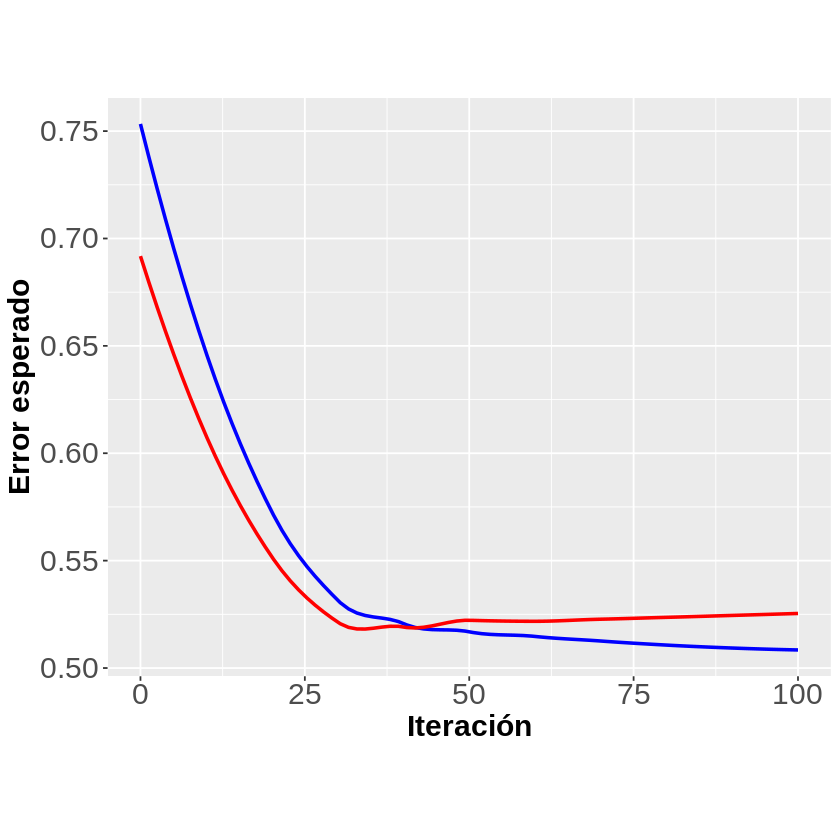

In [97]:
iterations = seq(from = 0, to = 100, by=10)
errores = data.frame(iterations,train_error2,validation_error2)
ggplot(errores) +  
  geom_smooth(aes(x=iterations,y=train_error2), color = "blue", se = FALSE) + 
  geom_smooth(aes(x=iterations,y=validation_error2), color = "red", se = FALSE) +
  theme(axis.text=element_text(size=18), 
    axis.title=element_text(size=18,face="bold"), 
    legend.text=element_text(size=18), 
    legend.title=element_text(size=18),
    aspect.ratio=0.8) + 
    xlab("Iteración") + ylab("Error esperado")

In [101]:
errores

iterations,train_error2,validation_error2
<dbl>,<dbl>,<dbl>
0,0.7632608,0.6940354
10,0.6312793,0.6131110
20,0.5637918,0.5268964
30,0.5331545,0.5277119
40,0.5225641,0.5241092
50,0.5189614,0.5210289
60,0.5141183,0.5218818
70,0.5129134,0.5232330
80,0.5111633,0.5236318


**(d) (1 punto)** En base a los resultados que obtuvo en el ítem anterior, entrene la red neuronal con 30 neuronas utilizando el número óptimo de iteraciones. Calcule los errores dentro y fuera de la muestra, y compare este modelo con la red neuronal más simple que entrenó anteriormente. ¿Qué modelo generaliza mejor? ¿Qué modelo esperaríamos que cometa menos error al utilizarlo para estudiantes que no se encuentran en la base de datos?

In [106]:
grid3 = expand.grid(size=30, decay=0)
set.seed(86)
control3 = trainControl(method = "cv", number=3, summaryFunction=Resumen, seeds = semillas, classProbs=TRUE)
model_nnet_4 = train(CYT ~ PROM_GRAL + ASISTENCIA + EDAD_ALU + GEN_ALU + COD_DEPE2 + RURAL_RBD + COD_REG_RBD, 
                     data = training3, 
                     method = "nnet", 
                     trControl = control3, 
                     maxit=50, 
                     metric="logLoss", 
                     linOut = FALSE, 
                     trace = FALSE, 
                     tuneGrid=grid3)

In [108]:
model_nnet_4

Neural Network 

4302 samples
   7 predictor
   2 classes: 'no', 'si' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 2869, 2867, 2868 
Resampling results:

  Accuracy   Kappa      ROC        Sens       Spec       AUC        Precision
  0.7236235  0.4021375  0.7771823  0.7610291  0.6531136  0.8459305  0.8099801
  Recall     F          logLoss  
  0.7610291  0.7823862  0.5210289

Tuning parameter 'size' was held constant at a value of 30
Tuning
 parameter 'decay' was held constant at a value of 0

In [107]:
pred_train4 = predict(model_nnet_4, newdata = training3,  type = "prob")
Ein4 = mean(error_entropia_binaria(training3$CYT, pred_train4[,2]))

pred_real4 = predict(model_nnet_4, newdata = testing3,  type = "prob")
Eout4 = mean(error_entropia_binaria(testing3$CYT, pred_real4[,2]))

cat("El error dentro de la muestra, calculado directamente, es ", Ein4,"\n")
cat("El error fuera de la muestra es ", Eout4,"\n")

El error dentro de la muestra, calculado directamente, es  0.4917441 
El error fuera de la muestra es  0.4902991 


* El modelo de redes neuronales del punto b (10 neuronas en la capa oculta, 100 iteraciones y validación cruzada de 3 folds) obtuvo un error dentro y fuera de la muestra de 47.54% y 47.88%, respectivamente. Es decir, menor que el modelo de redes neuronales recién entrenado entrenado (las mismas semillas del modelo b, 30 neuronas en la capa oculta, 50 iteraciones y validación cruzada de 3 folds), que obtuvo 49.17% y 49.02%, respectivamente. 
* La diferencia entre los errores de ambos modelos es pequeña (menos del 2%), y aunque en teoría el modelo del punto b se desempeñaría mejor ante registros que no conoce (error fuera de la muestra es menor), el modelo recién entrenado tiene indicadores de exactitud y precisión superiores en un 2% y un error LogLoss menor en un 5%.
* En conclusión, el modelo recién entrenado podría desempeñarse tan o mejor que el modelo del punto b.